# 보검이는 뭐할까?

```
1:WALKING
2:WALKING_UPSTAIRS
3:WALKING_DOWNSTAIRS
4:SITTING 
5:STANDING
6:LAYING

In [1]:
labels={"1":"WALKING","2":"WALKING_UPSTAIRS",
         "3":"WALKING_DOWNSTAIRS","4":"SITTING",
         "5":"STANDING","6":"LAYING" }
list(labels.values())

['WALKING',
 'WALKING_UPSTAIRS',
 'WALKING_DOWNSTAIRS',
 'SITTING',
 'STANDING',
 'LAYING']

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split   #데이터 셋 분리
from sklearn.metrics import accuracy_score  #분류 평가
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier 


# 경고메세지 끄기
import warnings
warnings.filterwarnings(action='ignore')

##########데이터 로드

df = pd.read_csv('./data/human_activity.csv')
labels={1:"WALKING",2:"WALKING_UPSTAIRS",
         3:"WALKING_DOWNSTAIRS",4:"SITTING",
         5:"STANDING",6:"LAYING" }
##########데이터 분석

##########데이터 전처리

x_data = df.drop(['action'], axis=1)
y_data = df['action']

# print(x_data.head())


x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=43, stratify=y_data)

##########모델 생성

model = DecisionTreeClassifier(random_state=43,min_samples_split=3)
# model = DecisionTreeClassifier(criterion='gini', max_depth=None, max_leaf_nodes=None, min_samples_split=2, min_samples_leaf=1, max_features=None)

##########모델 학습

model.fit(x_train, y_train)

##########모델 검증

print(f'훈련_Accuracy: {model.score(x_train, y_train)}') 
print(f'테스트_Accuracy: {model.score(x_test, y_test)}') 

#평가 리포트

y_predict = model.predict(x_test)
print(classification_report(y_test,y_predict,target_names=list(labels.values())))

##########모델 예측

# x_real = np.array([
#     [5.3, 3.7, 1.5, 0.2]
# ])

# y_real_predict = model.predict(x_real)
# label = labels[y_real_predict[0]]

# y_real_proba = model.predict_proba(x_real)
# confidence = y_real_proba[0][y_real_proba[0].argmax()]

# print(f'분류결과:{label} {confidence}')


훈련_Accuracy: 0.9986128450547926
테스트_Accuracy: 0.9294498381877022
                    precision    recall  f1-score   support

           WALKING       0.93      0.96      0.94       517
  WALKING_UPSTAIRS       0.92      0.89      0.91       463
WALKING_DOWNSTAIRS       0.92      0.92      0.92       422
           SITTING       0.90      0.89      0.89       533
          STANDING       0.90      0.91      0.90       572
            LAYING       1.00      1.00      1.00       583

          accuracy                           0.93      3090
         macro avg       0.93      0.93      0.93      3090
      weighted avg       0.93      0.93      0.93      3090



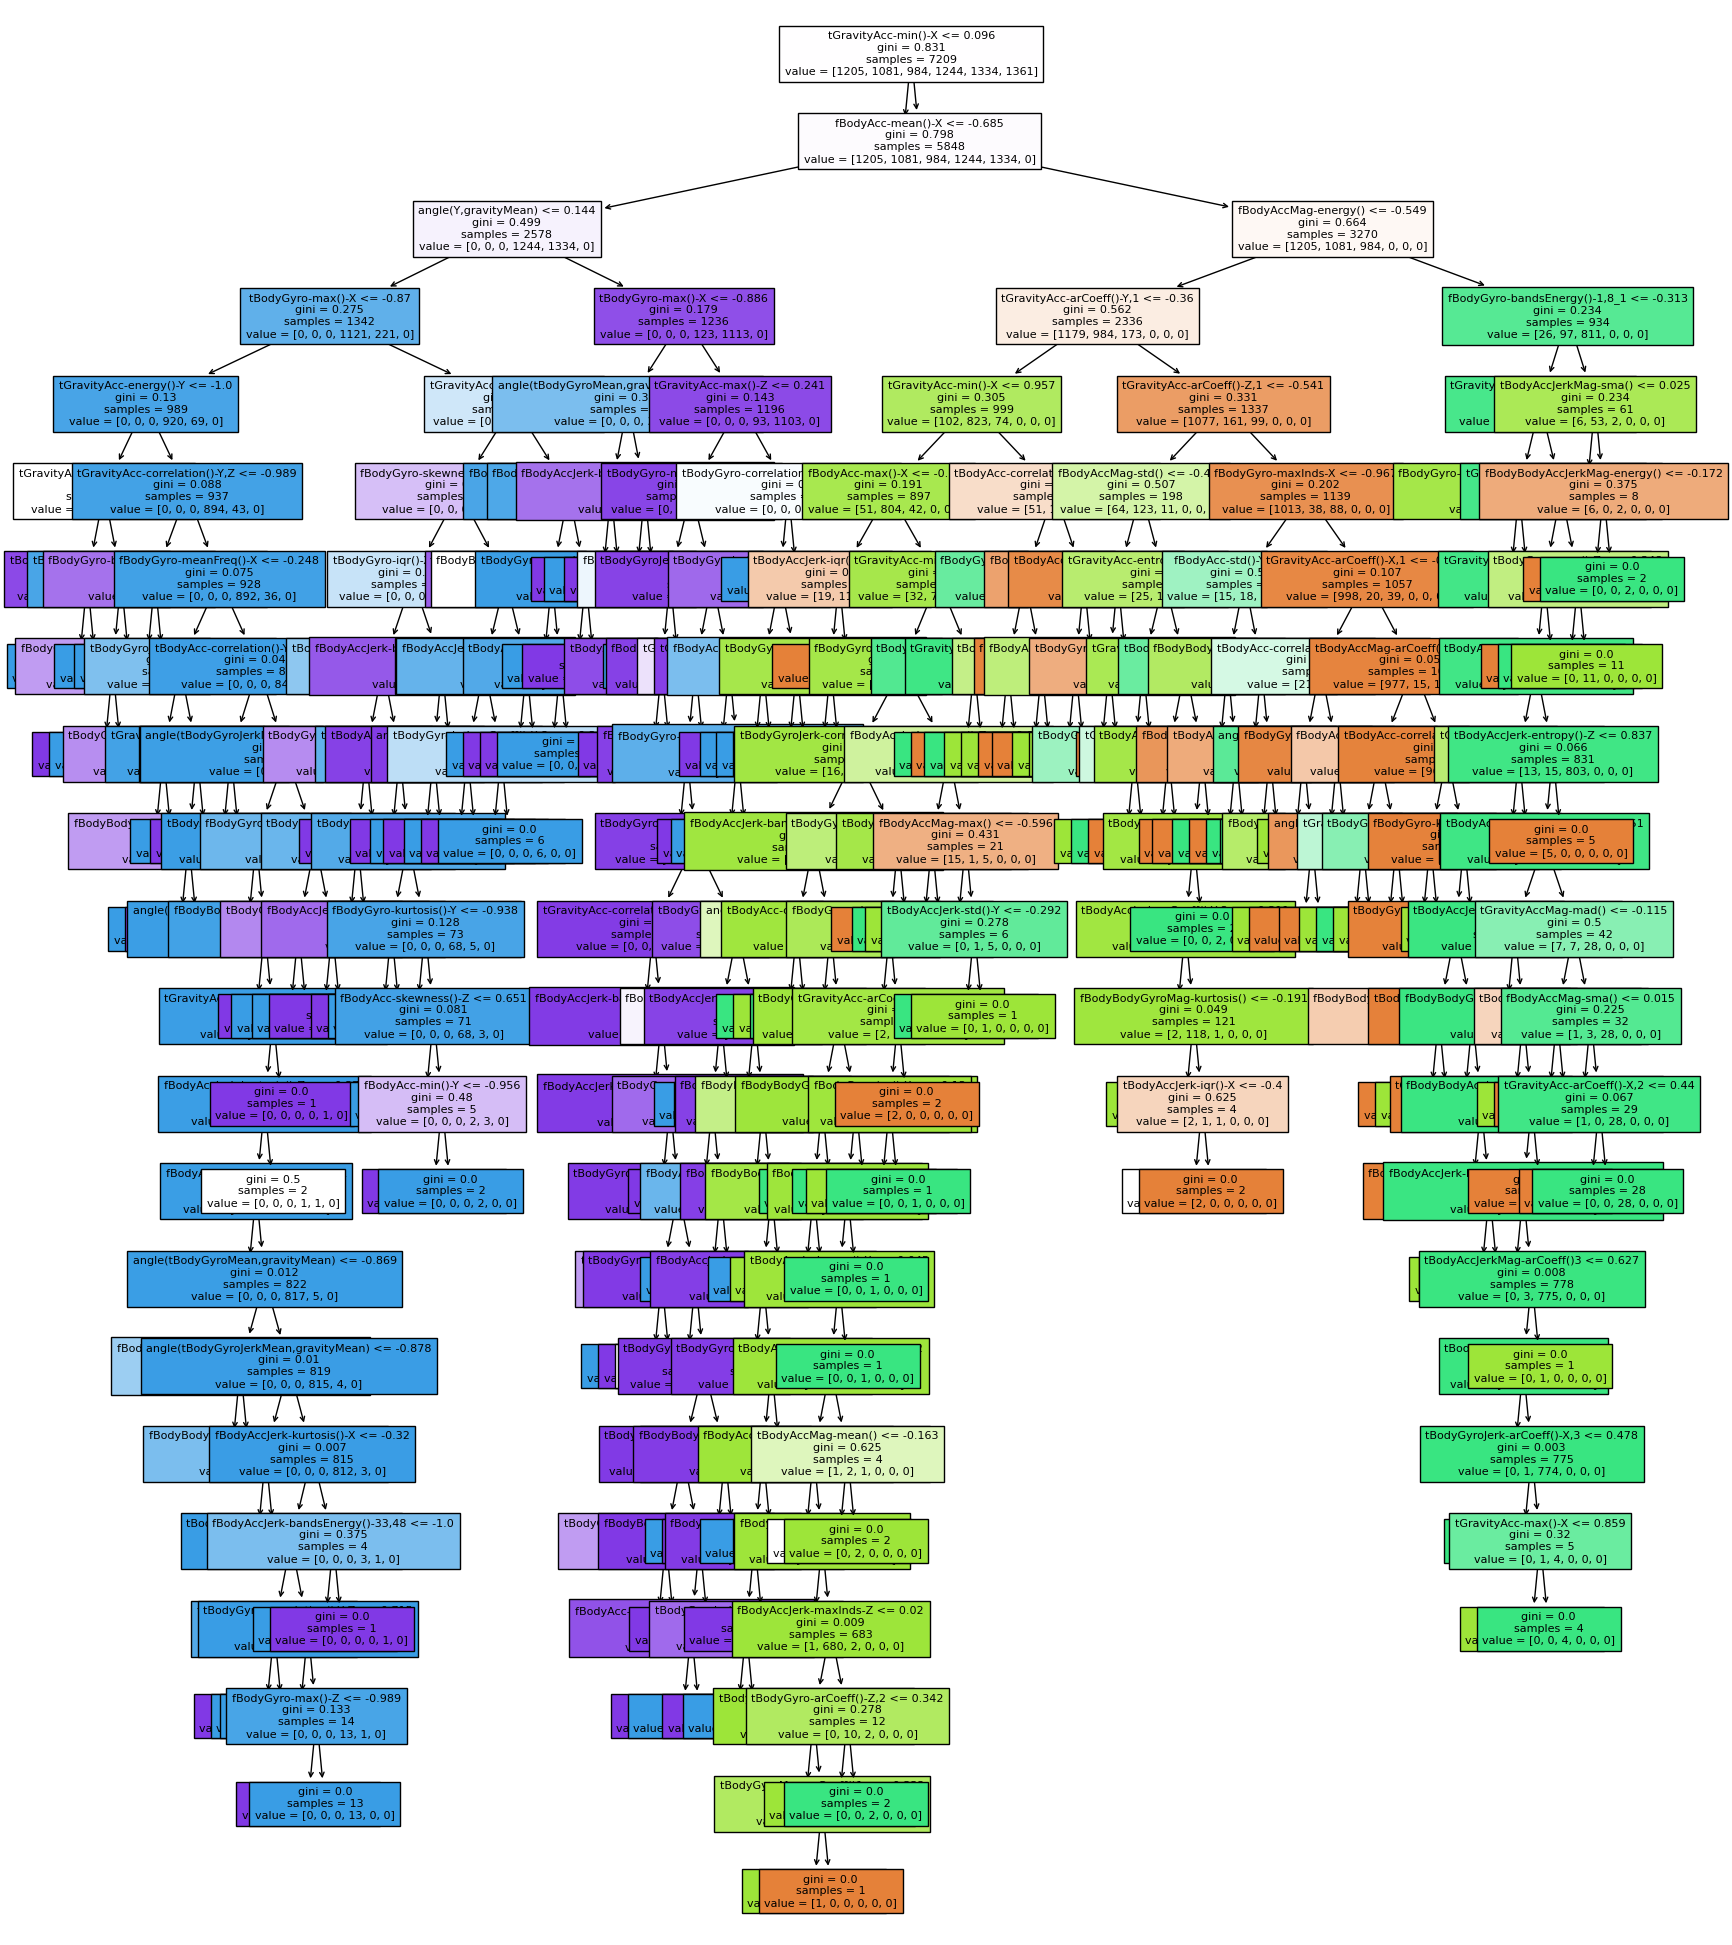

In [3]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,25))

plot_tree(model,filled=True, feature_names=x_data.columns.to_list(),fontsize=8)

plt.show()

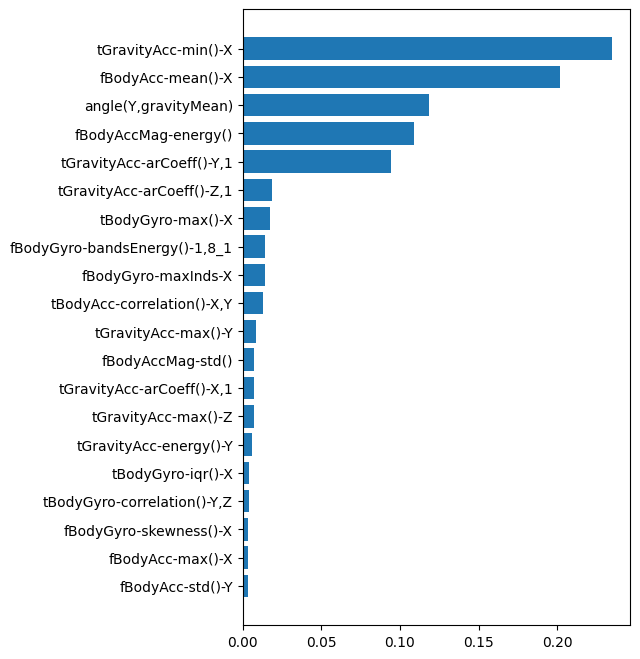

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# feature importance를 column 별로 시각화 하기 
# sns.barplot(x=dt_clf.feature_importances_ , y=iris_data.feature_names)

rank = pd.Series(data=model.feature_importances_,index=x_data.columns).sort_values(ascending=False)[:20]

plt.figure(figsize=(5,8))
plt.barh(rank.index,rank.values)
plt.yticks(rank.index)
plt.gca().invert_yaxis() #좌표 뒤집기
plt.show()

```
500개가 넘는 피쳐중에 정작 분류에 영향을 주는 것은 20~30개 정도인 것 같다. 
훈련 효율을 위해 주요한 피쳐만 추출해서 훈련해야 겠다.
```

In [24]:
list(rank.index)

['tGravityAcc-min()-X',
 'fBodyAcc-mean()-X',
 'angle(Y,gravityMean)',
 'fBodyAccMag-energy()',
 'tGravityAcc-arCoeff()-Y,1',
 'tGravityAcc-arCoeff()-Z,1',
 'tBodyGyro-max()-X',
 'fBodyGyro-bandsEnergy()-1,8_1',
 'fBodyGyro-maxInds-X',
 'tBodyAcc-correlation()-X,Y',
 'tGravityAcc-max()-Y',
 'fBodyAccMag-std()',
 'tGravityAcc-arCoeff()-X,1',
 'tGravityAcc-max()-Z',
 'tGravityAcc-energy()-Y',
 'tBodyGyro-iqr()-X',
 'tBodyGyro-correlation()-Y,Z',
 'fBodyGyro-skewness()-X',
 'fBodyAcc-max()-X',
 'fBodyAcc-std()-Y']